**INTEGRANTES CHALLANGE IBM**

**NOMES:**

Felipe Breno Sugisawa Altran - RM 94170 </br>
Leandro Alves de Souza Braga - RM 94513 </br>
Leonardo Lima Barbosa - RM 95432 </br>
Rafaela Gomes da Silva - RM 94972 </br>
Vinicius Alves Torres - RM 94266 </br>

**Análise Exploratória**


# **Bibliotecas**

In [ ]:
# BIBLIOTECAS

# Tratamento dos dados
import numpy as np
import pandas as pd
from collections import Counter

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#######################################################################
# IMPORTAR SEUS MODELOS DE MACHILE LEARNING E OUTRAS BIBS NECESSÁRIAS
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#######################################################################

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, plot_roc_curve

# importando os datasets padroes do sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

In [ ]:
# Armazenandos os dados em um DataFrame
# dados = pd.read_csv("dados_rh.csv", sep = ',') 

#-------------------------------------------------------------------------------#
# https://drive.google.com/file/d/19yBRjIOf3n7aoTOzi1une26m7ooTjNaw/view?usp=sharing
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '19yBRjIOf3n7aoTOzi1une26m7ooTjNaw'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './dados_rh.csv', 
                                    showsize = True)# (link hash, save here as, view download)

dados = pd.read_csv("dados_rh.csv", sep = ',')

# Tipos de dados envolvidos

In [ ]:
# Colunas e Linhas
dados[["id_empregado","educacao","departamento","genero","canal_de_recrutamento","n_de_treinamentos","idade","pontuacao_ano_anterior","tempo_de_servico","KPIs >80%","venceu_premiacoes?","pontuacao_media_treinamentos","foi_promovido"]]

,id_empregado,educacao,departamento,genero,canal_de_recrutamento,n_de_treinamentos,idade,pontuacao_ano_anterior,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido
0,65438,Mestrado & acima,Vendas & Marketing,F,processo seletivo,1,35,5.0,8,1,0,49,0
1,65141,Bacharelado,Operacoes,M,outros,1,30,5.0,4,0,0,60,0
2,7513,Bacharelado,Vendas & Marketing,M,processo seletivo,1,34,3.0,7,0,0,50,0
3,2542,Bacharelado,Vendas & Marketing,M,outros,2,39,1.0,10,0,0,50,0
4,48945,Bacharelado,Tecnologia,M,outros,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Bacharelado,Tecnologia,M,processo seletivo,1,48,3.0,17,0,0,78,0
54804,74592,Mestrado & acima,Operacoes,F,outros,1,37,2.0,6,0,0,56,0
54805,13918,Bacharelado,Analise,M,outros,1,27,5.0,3,1,0,79,0
54806,13614,NaN,Vendas & Marketing,M,processo seletivo,1,29,1.0,2,0,0,45,0


In [ ]:
dados.head()

,id_empregado,departamento,regiao,educacao,genero,canal_de_recrutamento,n_de_treinamentos,idade,pontuacao_ano_anterior,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido
0,65438,Vendas & Marketing,regiao_7,Mestrado & acima,F,processo seletivo,1,35,5.0,8,1,0,49,0
1,65141,Operacoes,regiao_22,Bacharelado,M,outros,1,30,5.0,4,0,0,60,0
2,7513,Vendas & Marketing,regiao_19,Bacharelado,M,processo seletivo,1,34,3.0,7,0,0,50,0
3,2542,Vendas & Marketing,regiao_23,Bacharelado,M,outros,2,39,1.0,10,0,0,50,0
4,48945,Tecnologia,regiao_26,Bacharelado,M,outros,1,45,3.0,2,0,0,73,0


In [ ]:
# Tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_de_treinamentos             48660 non-null  int64  
 1   idade                         48660 non-null  int64  
 2   pontuacao_ano_anterior        48660 non-null  float64
 3   tempo_de_servico              48660 non-null  int64  
 4   KPIs >80%                     48660 non-null  int64  
 5   venceu_premiacoes?            48660 non-null  int64  
 6   pontuacao_media_treinamentos  48660 non-null  int64  
 7   foi_promovido                 48660 non-null  int64  
 8   Genero_num                    48660 non-null  int64  
 9   educacao_num                  48660 non-null  int64  
 10  canal_de_recrutamento_num     48660 non-null  int64  
 11  departamento_num              48660 non-null  int64  
 12  regiao_num                    48660 non-null  int64  
dtypes

# Médias, desvios padrões e distribuição dos dados

In [ ]:
# Verificando médias,desvio padrões e distribuição de dados
dados.describe()

,id_empregado,n_de_treinamentos,idade,pontuacao_ano_anterior,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc552a8bbd0>,
      dtype=object)

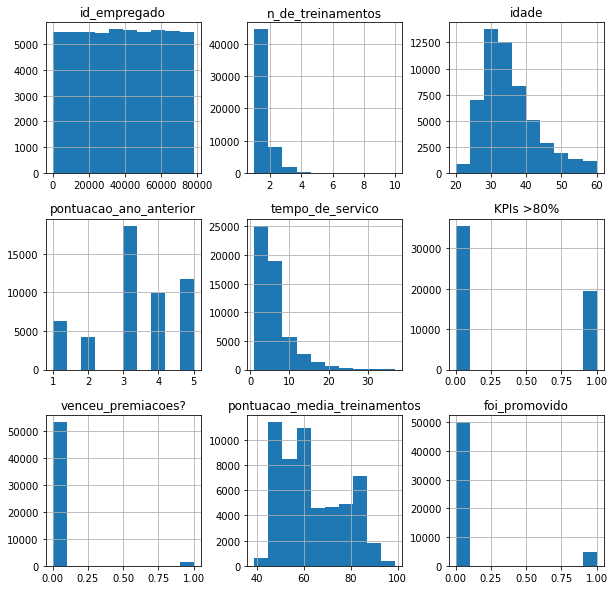

In [ ]:
# Histogramas - distribuição de dados
dados.hist(figsize=(10,10))

# Valores nulos

In [ ]:
dados.shape

(54808, 14)

In [ ]:
# Valores nulos
dados.isnull()

,id_empregado,departamento,regiao,educacao,genero,canal_de_recrutamento,n_de_treinamentos,idade,pontuacao_ano_anterior,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Contando a quantidade de valores verdadeiros ou falsos das colunas
dados.isnull().sum()

id_empregado                       0
departamento                       0
regiao                             0
educacao                        2409
genero                             0
canal_de_recrutamento              0
n_de_treinamentos                  0
idade                              0
pontuacao_ano_anterior          4124
tempo_de_servico                   0
KPIs >80%                          0
venceu_premiacoes?                 0
pontuacao_media_treinamentos       0
foi_promovido                      0
dtype: int64

In [ ]:
# Tratando os valores nulos
dados_drop = dados.dropna()
print ("Dados: ",dados.shape, "|", "Dados sem valores nulos: ",dados_drop.shape)

Dados:  (54808, 14) | Dados sem valores nulos:  (48660, 14)


In [ ]:
#Eliminando os valores nulos
dados.dropna(inplace=True)
print (dados.shape)

(48660, 14)


In [ ]:
mascara_pontuacao = dados["pontuacao_ano_anterior"].isnull()
dados[mascara_pontuacao].shape

(0, 14)

In [ ]:
mascara_educacao = dados["educacao"].isnull()
dados[mascara_educacao].shape

(0, 14)

In [ ]:
dados["pontuacao_ano_anterior"].fillna(3.0,inplace=True)

In [ ]:
dados["educacao"].fillna("Bacharelado",inplace=True)

In [ ]:
mascara_pontuacao = dados["pontuacao_ano_anterior"].isnull()
dados[mascara_pontuacao].shape

(0, 14)

In [ ]:
mascara_pontuacao = dados["educacao"].isnull()
dados[mascara_pontuacao].shape

(0, 14)

# Dados Categóricos

In [ ]:
#Dados Categóricos
colunas_categoricas = ["departamento", "regiao", "educacao", "genero", "canal_de_recrutamento"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


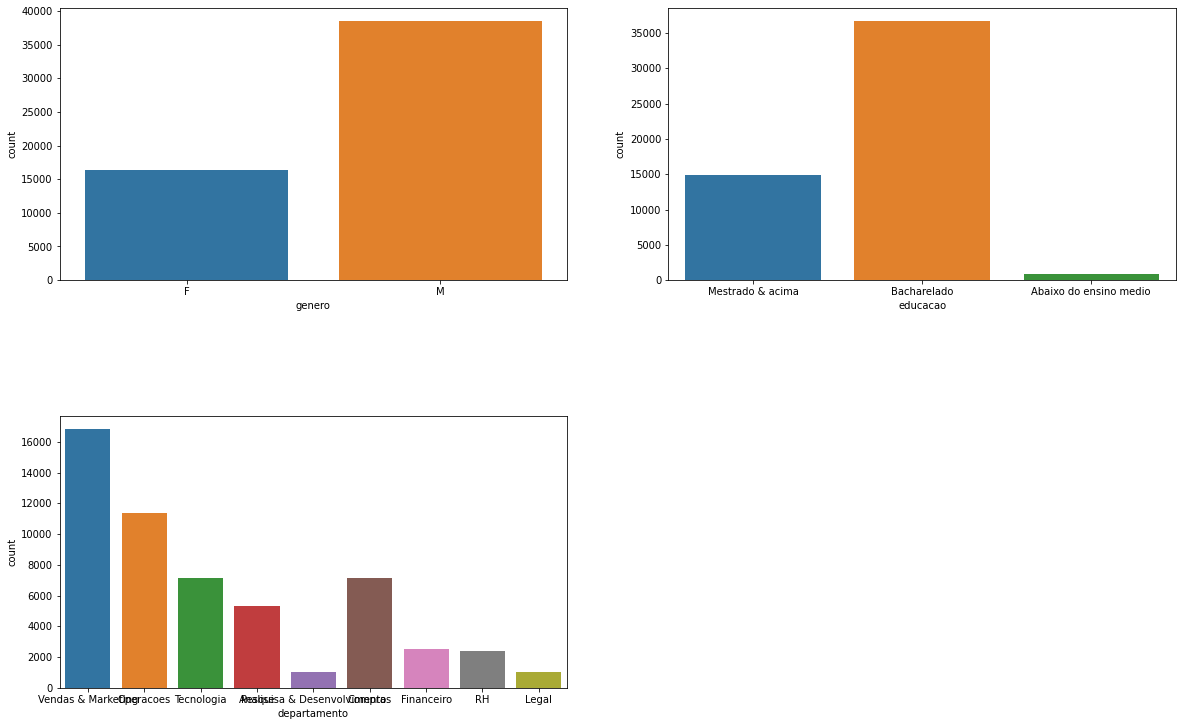

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in colunas_categoricas:
    plt.subplot(3,2,i)
    sns.countplot(dados[col_name])
    i += 1

In [ ]:
# Explorarando dados categoricos, pelo tamanho
dados.groupby(['departamento']).size()

departamento
Analise                        4610
Compras                        6641
Financeiro                     2219
Legal                           867
Operacoes                     10547
Pesquisa & Desenvolvimento      893
RH                             2142
Tecnologia                     6502
Vendas & Marketing            14239
dtype: int64

In [ ]:
# Explorarando dados categoricos, pelo tamanho
dados["regiao"].value_counts()

regiao_2     12343
regiao_22     6428
regiao_7      4843
regiao_15     2808
regiao_13     2648
regiao_26     2260
regiao_31     1935
regiao_4      1703
regiao_27     1659
regiao_16     1465
regiao_28     1318
regiao_11     1315
regiao_23     1175
regiao_29      994
regiao_32      945
regiao_19      874
regiao_20      850
regiao_14      827
regiao_25      819
regiao_17      796
regiao_5       766
regiao_6       690
regiao_30      657
regiao_8       655
regiao_10      648
regiao_1       610
regiao_24      508
regiao_12      500
regiao_9       420
regiao_21      411
regiao_3       346
regiao_34      292
regiao_33      269
regiao_18       31
Name: regiao, dtype: int64

In [ ]:
# Explorarando dados categoricos, pelo tamanho
dados["educacao"].value_counts()

Bacharelado               36669
Mestrado & acima          14925
Abaixo do ensino medio      805
Name: educacao, dtype: int64

In [ ]:
# Explorarando dados categoricos, pelo tamanho
dados["canal_de_recrutamento"].value_counts()

outros               30446
processo seletivo    23220
indicacao             1142
Name: canal_de_recrutamento, dtype: int64

In [ ]:
# Explorarando dados categoricos, pelo tamanho
dados.groupby(['genero']).size()
 

genero
F    14808
M    33852
dtype: int64

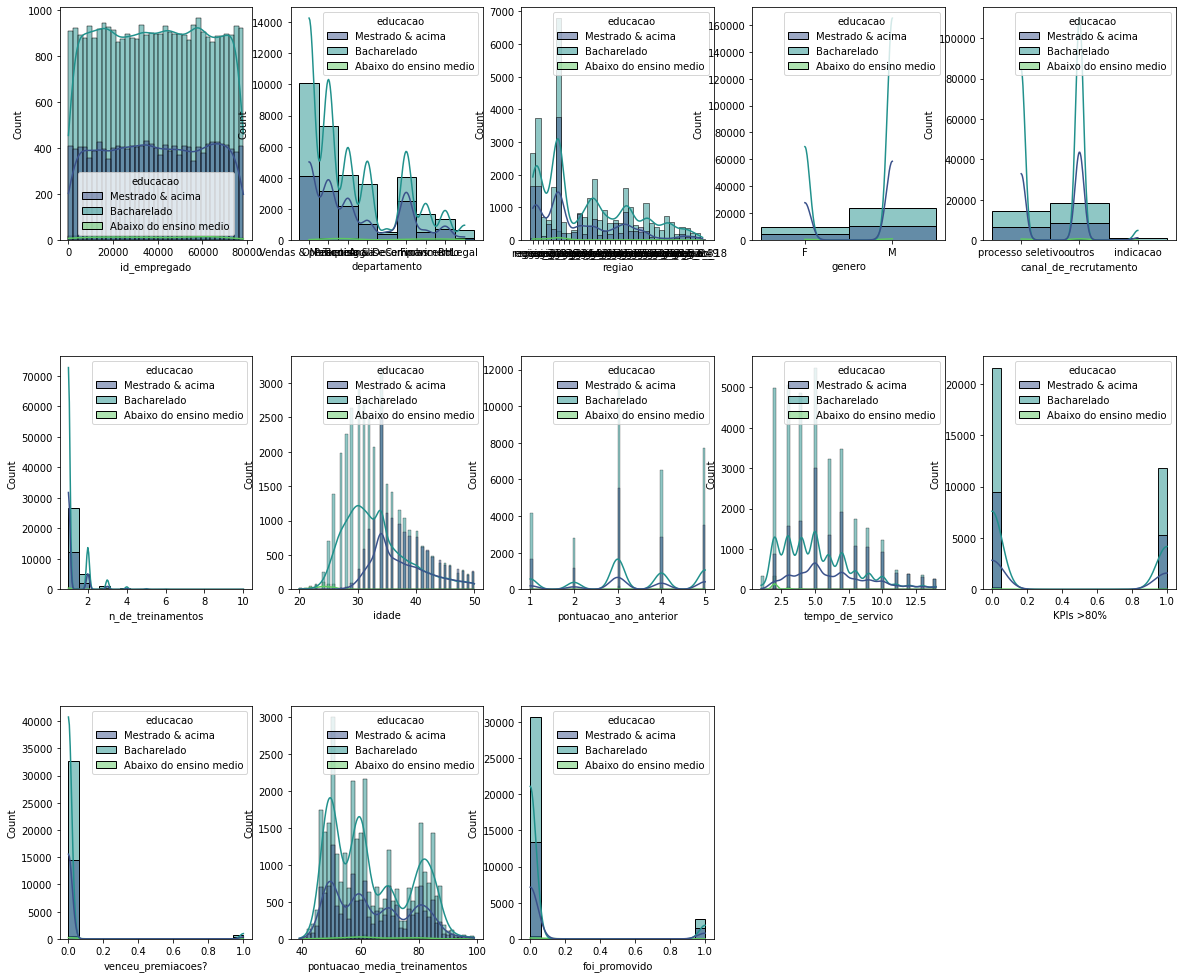

In [ ]:
# Explorarando as possíveis relações
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.5)
i = 1

colunas_categoricas=["educacao"]

for col_name in dados.columns.drop(colunas_categoricas):
    plt.subplot(5,5,i)
    sns.histplot(data=dados, x=col_name, kde=True, hue='educacao', multiple='layer', alpha=0.5, palette='viridis')
    i += 1

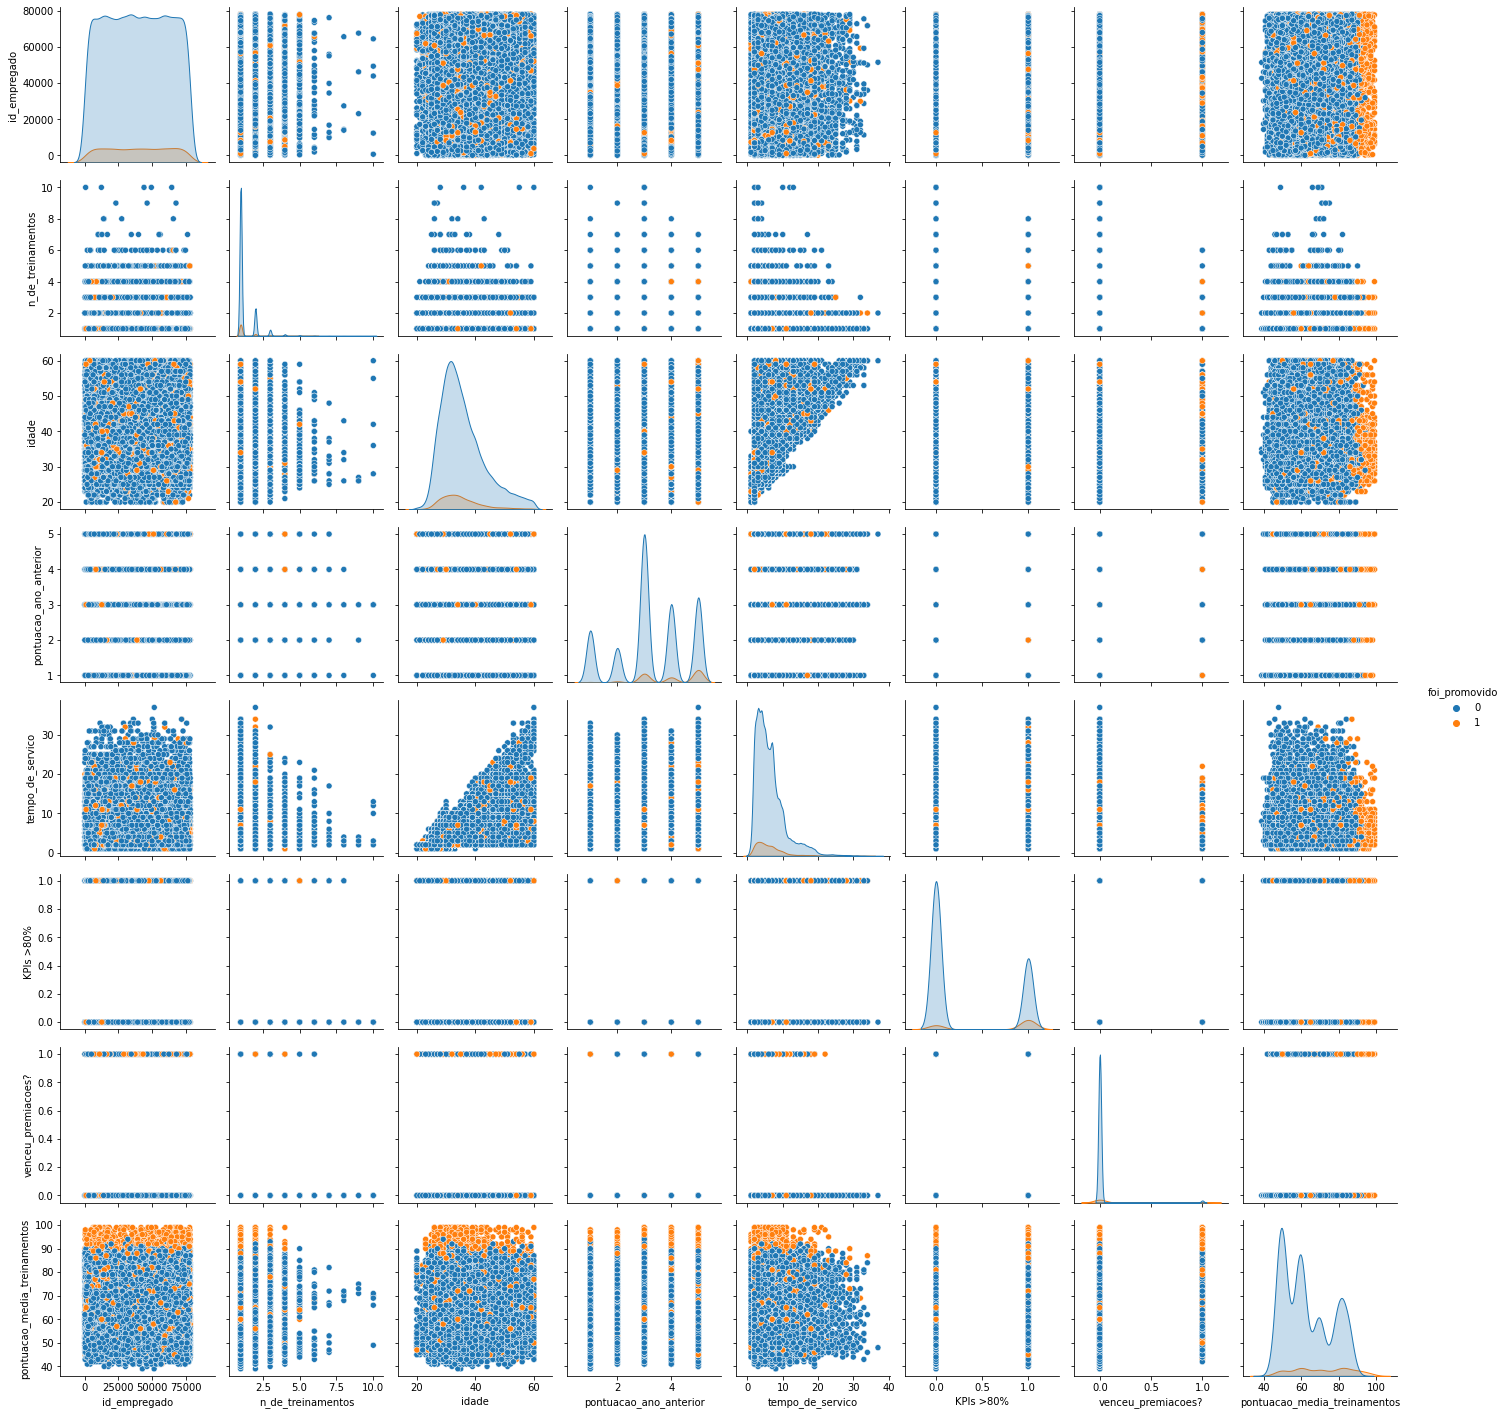

In [ ]:
sns.pairplot(data = dados, hue = "foi_promovido")

In [ ]:
# Transformando os dados em valores numéricos // Labeling Enconding 
dados['Genero_num'] = dados['genero'].replace({'F': 0, 'M': 1})

# Label Enconding:
dados['educacao_num'] = dados['educacao'].replace({'Bacharelado': 0, 'Mestrado & acima' : 1, 'Abaixo do ensino medio' : 2})

dados["canal_de_recrutamento_num"] = dados["canal_de_recrutamento"].replace({'indicacao': 0, 'processo seletivo': 1, 'outros': 2})

dados["departamento_num"] = dados["departamento"].replace({'Pesquisa & Desenvolvimento': 0, 
                                                                                 'Legal': 1, 
                                                                                 'RH': 2, 
                                                                                 'Financeiro': 3, 
                                                                                 'Analise': 4, 
                                                                                 'Compras': 5, 
                                                                                 'Tecnologia': 6, 
                                                                                 'Operacoes': 7, 
                                                                                 'Vendas & Marketing': 8})

dados["regiao_num"] = dados["regiao"].replace({'regiao_1': 0, 
                                                                     'regiao_2': 1,
                                                                     'regiao_3': 2,
                                                                     'regiao_4': 3,
                                                                     'regiao_5': 4,
                                                                     'regiao_6': 5,
                                                                     'regiao_7': 6,
                                                                     'regiao_8': 7,
                                                                     'regiao_9': 8,
                                                                     'regiao_10': 9,
                                                                     'regiao_11': 10,
                                                                     'regiao_12': 11,
                                                                     'regiao_13': 12,
                                                                     'regiao_14': 13,
                                                                     'regiao_15': 14,
                                                                     'regiao_16': 15,
                                                                     'regiao_17': 16,
                                                                     'regiao_18': 17,
                                                                     'regiao_19': 18,
                                                                     'regiao_20': 19,
                                                                     'regiao_21': 20,
                                                                     'regiao_22': 21,
                                                                     'regiao_23': 22,
                                                                     'regiao_24': 23,
                                                                     'regiao_25': 24,
                                                                     'regiao_26': 25,
                                                                     'regiao_27': 26,
                                                                     'regiao_28': 27,
                                                                     'regiao_29': 28,
                                                                     'regiao_30': 29,
                                                                     'regiao_31': 30,
                                                                     'regiao_32': 31,
                                                                     'regiao_33': 32,
                                                                     'regiao_34': 33,
                                                                     })


dados.head()

,id_empregado,departamento,regiao,educacao,genero,canal_de_recrutamento,n_de_treinamentos,idade,pontuacao_ano_anterior,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido,Genero_num,educacao_num,canal_de_recrutamento_num,departamento_num,regiao_num
0,65438,Vendas & Marketing,regiao_7,Mestrado & acima,F,processo seletivo,1,35,5.0,8,1,0,49,0,0,1,1,8,6
1,65141,Operacoes,regiao_22,Bacharelado,M,outros,1,30,5.0,4,0,0,60,0,1,0,2,7,21
2,7513,Vendas & Marketing,regiao_19,Bacharelado,M,processo seletivo,1,34,3.0,7,0,0,50,0,1,0,1,8,18
3,2542,Vendas & Marketing,regiao_23,Bacharelado,M,outros,2,39,1.0,10,0,0,50,0,1,0,2,8,22
4,48945,Tecnologia,regiao_26,Bacharelado,M,outros,1,45,3.0,2,0,0,73,0,1,0,2,6,25


In [ ]:
dados.drop(columns = ["id_empregado", "departamento", "regiao", "educacao", "genero", "canal_de_recrutamento"], inplace=True)

In [ ]:
dados.head()

,n_de_treinamentos,idade,pontuacao_ano_anterior,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido,Genero_num,educacao_num,canal_de_recrutamento_num,departamento_num,regiao_num
0,1,35,5.0,8,1,0,49,0,0,1,1,8,6
1,1,30,5.0,4,0,0,60,0,1,0,2,7,21
2,1,34,3.0,7,0,0,50,0,1,0,1,8,18
3,2,39,1.0,10,0,0,50,0,1,0,2,8,22
4,1,45,3.0,2,0,0,73,0,1,0,2,6,25


# Outliers

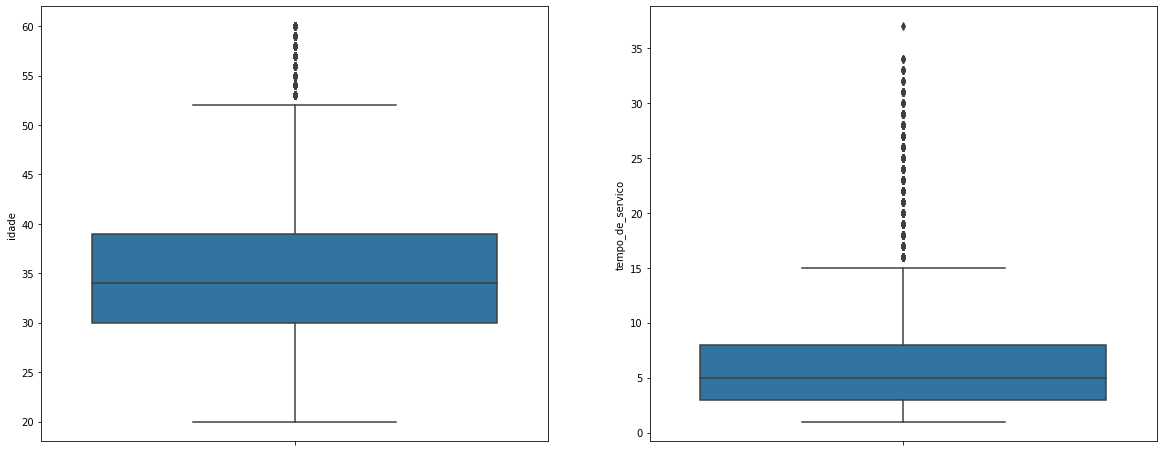

In [ ]:
# Outliers com Boxplots / completo
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
 
colunas_categoricas = ["idade","tempo_de_servico"]
 
i = 1
for col_name in colunas_categoricas:
    plt.subplot(2,2,i)
    sns.boxplot(data=dados,y=col_name)
    i +=1

In [ ]:
media_age = dados["idade"].mean()
"Media de idade: ", media_age

('Media de idade: ', 35.58943690916564)

In [ ]:
desv_pad_age = dados["idade"].std()
"Desvio padrão de Idade: ",desv_pad_age

('Desvio padrão de Idade: ', 7.5345710153233405)

In [ ]:
print(f"Valor minimo: {media_age -2 * desv_pad_age}\nValor Maximo{media_age +2 * desv_pad_age }")

Valor minimo: 20.52029487851896
Valor Maximo50.65857893981232


In [ ]:
dados["idade"][(dados["idade"] <media_age -2 * desv_pad_age) | (dados["idade"] > media_age +3 *desv_pad_age)].shape

(463,)

In [ ]:
mediana_age = dados["idade"].median()
dados["idade"][(dados["idade"]< -2* desv_pad_age) | (dados["idade"] > media_age +2 * desv_pad_age)] = mediana_age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dados["idade"][(dados["idade"]< media_age -2 * desv_pad_age) | (dados["idade"] > media_age +3 * desv_pad_age)].shape

(51,)

In [ ]:
media_time = dados["tempo_de_servico"].mean()
"Media de tempo de servico: ", media_time

('Media de tempo de servico: ', 6.311570078092889)

In [ ]:
desv_pad_time = dados["tempo_de_servico"].std()
"Desvio padrão de tempo de servico: ",desv_pad_time

('Desvio padrão de tempo de servico: ', 4.204759614109037)

In [ ]:
print(f"Valor minimo: {media_time -2 * desv_pad_time}\nValor Maximo{media_time +2 * desv_pad_time }")

Valor minimo: -2.097949150125184
Valor Maximo14.721089306310962


In [ ]:
dados["tempo_de_servico"][(dados["tempo_de_servico"] <media_time -2 * desv_pad_time) | (dados["tempo_de_servico"] > media_time +3 *desv_pad_time)].shape

(949,)

In [ ]:
mediana_time = dados["tempo_de_servico"].median()
dados["tempo_de_servico"][(dados["tempo_de_servico"]< -2* desv_pad_age) | (dados["tempo_de_servico"] > media_time +2 * desv_pad_time)] = mediana_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dados["tempo_de_servico"][(dados["tempo_de_servico"]< media_age -2 * desv_pad_time) | (dados["tempo_de_servico"] > media_age +3 * desv_pad_time)].shape

(48660,)

# Heatmap com a correlação de Pearson a relação entre os atributos

In [ ]:
correlation = dados.corr()

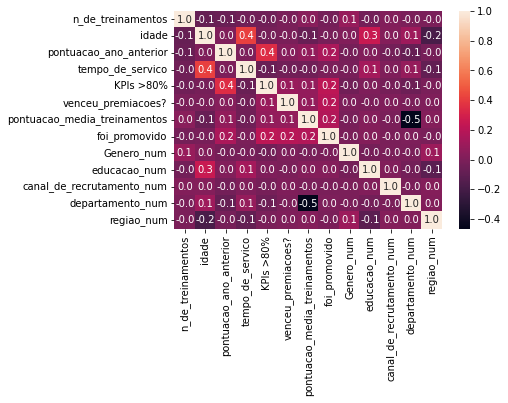

In [ ]:
# Verificar via heatmap com a correlação de Pearson a relação entre os atributos
sns.heatmap(dados.corr(method = "pearson"), annot = True, fmt=".1f")

# Treinando os modelos de IA

In [ ]:
# Separando os dados de entrada e de saída
X = dados.drop(columns=["foi_promovido"])
Y = dados["foi_promovido"]


# Dividindo os dados no conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# levantando os minimos e maximos
scaler = MinMaxScaler().fit(X_train)

# Mudando a escala dos dados
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
#Árvore de Decisão:
clf_Arvore_Decisao = DecisionTreeClassifier(min_samples_split = 4)
clf_Arvore_Decisao.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=4)

In [ ]:
y_pred_AD = clf_Arvore_Decisao.predict(X_test)

In [ ]:
#Random Forest:
clf_RFC = RandomForestClassifier(min_samples_split = 8, n_estimators = 97)
clf_RFC.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=8, n_estimators=97)

In [ ]:
y_pred_RFC = clf_RFC.predict(X_test)

In [ ]:
#SVM:
clf_SVM = SVC(kernel = 'rbf')
clf_SVM.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_SVM = clf_SVM.predict(X_test)

In [ ]:
#Gaussiano:
clf_Gaussiano = GaussianNB()
clf_Gaussiano.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_Gaussiano = clf_Gaussiano.predict(X_test)

In [ ]:
#Discriminante Linear:
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_LDA = clf_LDA.predict(X_test)

In [ ]:
#Gradient Boosting Classifier:
clf_GBC = GradientBoostingClassifier(min_samples_split = 6, n_estimators = 87)
clf_GBC.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_split=6, n_estimators=87)

In [ ]:
y_pred_GBC = clf_GBC.predict(X_test)

In [ ]:
#Discriminante Quadratico:
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
y_pred_QDA = clf_QDA.predict(X_test)

# Metricas de desempenho

In [ ]:
labels_classificadores = [0,1]

In [ ]:
cm_AD = confusion_matrix(y_test,y_pred_AD, labels = labels_classificadores)
cm_RFC = confusion_matrix(y_test,y_pred_RFC, labels = labels_classificadores)
cm_SVM = confusion_matrix(y_test,y_pred_SVM, labels = labels_classificadores)
cm_Gaussiano = confusion_matrix(y_test,y_pred_Gaussiano, labels = labels_classificadores)
cm_LDA = confusion_matrix(y_test,y_pred_LDA, labels = labels_classificadores)
cm_QDA = confusion_matrix(y_test,y_pred_QDA, labels = labels_classificadores)
cm_GBC = confusion_matrix(y_test,y_pred_GBC, labels = labels_classificadores)


In [ ]:
matrizes_confusao = {'Arvore de Decisao' : cm_AD,
                     'Random Forest' : cm_RFC,
                     'SVM' : cm_SVM,
                     'Gaussiano' : cm_Gaussiano,
                     'LDA' : cm_LDA,
                     'QDA' : cm_QDA,
                     'GBC' : cm_GBC}

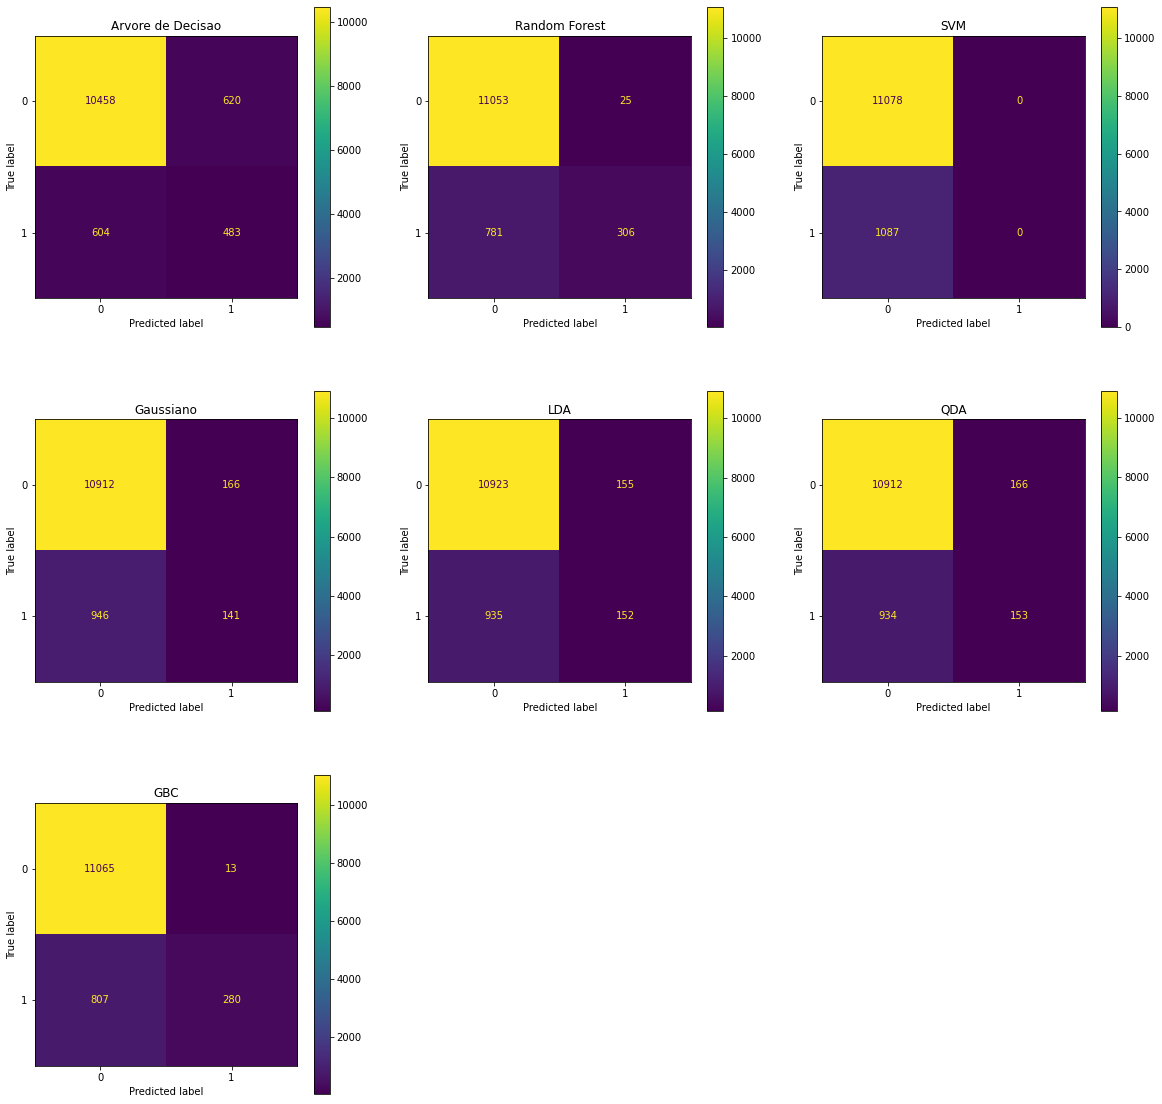

In [ ]:
# Plotando as matrizes de confusão
figure = plt.figure(figsize = (20,20))

for i, (nome_clf, cm) in enumerate(matrizes_confusao.items()):
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= labels_classificadores)
  ax = plt.subplot(3,3,i+1)
  disp.plot(ax=ax,values_format = "d")
  ax.set_title(nome_clf)

Com base na matriz de confusão, é possivel observar que os elementos tendem quando o predic é negativo. Já o predict positivo temos uma acertividade dos modelos Gradient Boosting e SVC.

In [ ]:
previsoes_modelos = {'Arvore de Decisao' : y_pred_AD,
                     'Random Forest' : y_pred_RFC,
                     'SVM' : y_pred_SVM,
                     'Gaussiano' : y_pred_Gaussiano,
                     'LDA' : y_pred_LDA,
                     'QDA' : y_pred_QDA,
                     'GBC' : y_pred_GBC}

In [ ]:
# Checando métricas
for nome_clf, y_pred in previsoes_modelos.items():
  print(nome_clf)
  print(classification_report(y_test,y_pred))

Arvore de Decisao
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     11078
           1       0.44      0.44      0.44      1087

    accuracy                           0.90     12165
   macro avg       0.69      0.69      0.69     12165
weighted avg       0.90      0.90      0.90     12165

Random Forest
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11078
           1       0.92      0.28      0.43      1087

    accuracy                           0.93     12165
   macro avg       0.93      0.64      0.70     12165
weighted avg       0.93      0.93      0.92     12165

SVM
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     11078
           1       0.00      0.00      0.00      1087

    accuracy                           0.91     12165
   macro avg       0.46      0.50      0.48     12165
weighted avg       0.83      0.91     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Conclusão**

Podemos concluir com base na análise feita que o melhor modelo para precisão seria o Random Forest com um valor acima de 92%.                                                                        Focando no Recall, temos três modelos que chegam ao valor desejado que seria o 1, são eles Random Forest,SVM e GradientBoosting.
Analisando o f1-score, chegamos a conclusão que temos dois modelos com um nivel de acertividade de 96% que seria Random Forest e GradientBoosting.<br><br>
Com isso, podemos concluir que o melhor modelo treinado para ser usado seria o Random Forest.
